In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

In [4]:
iris
import pandas as pd
df= pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
X=iris.data
y=iris.target

KNeighborsClassifier
我們使用之前所說明過的KNN分類法，並且定義n_neighbors=10，這裡的10是會去找附近的10個鄰居。



In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [16]:
knn = KNeighborsClassifier(n_neighbors=10)

cross_val_score
我們在前面圖片中，將資料分成10組，而這裡的cv=5是分成5組的意思。
'accuracy'則是一種方法，是顯示準確度高不高的方法（越高越好），接下來我們將得分取平均：

scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

In [17]:
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         1.         0.93333333 1.        ]
0.9800000000000001


改變n_neighbors
我們剛剛將n_neighbors=10，可以得到平均98%的準確度，我們要用交叉驗證來測試到底用多少個neighbor可以得到較高的準確度：

k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

In [18]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

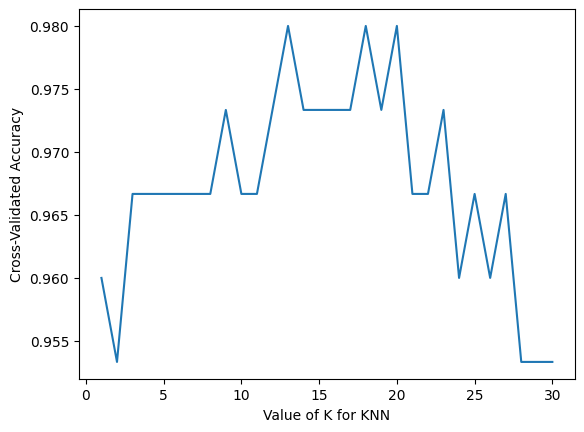

In [19]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

總結
我們可以從上圖看到不同的n_neighbors會有不同的準確度，中間取間的k數量是最好的，而到後面則有下降的趨勢，就是所謂的Overfitting，意思就是太過追求參數完美預測出訓練數據結果，反而會導致實際預測效果不佳。

